# Importing Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading Training Dataset

In [112]:
dfx = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
dfy = pd.read_csv('./Training Data/Diabetes_YTrain.csv')

In [113]:
x = dfx.values
y = dfy.values

In [114]:
print(x.shape)
print(y.shape)
y=y.reshape((-1,))

(576, 8)
(576, 1)


# Plotting Bar Graph

In [122]:
#It returns the two array . First the unique elements and second the count of each element
new_vals = np.unique(y,return_counts=True)
print(new_vals)

(array([0, 1], dtype=int64), array([375, 201], dtype=int64))


<BarContainer object of 2 artists>

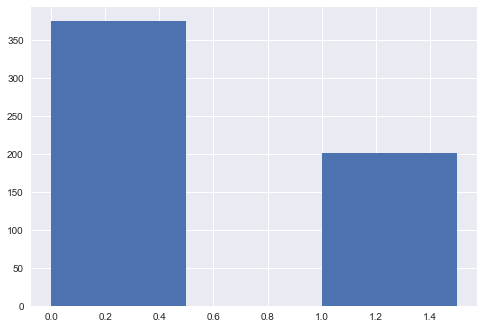

In [123]:
#Bar graph representing person have diabetes or not . First bar represent no second yes.
plt.bar(new_vals[0],new_vals[1],width=0.5,align='edge')

# Algorithm

In [117]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    #converting to numpy array
    vals = np.asarray(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #Converting datatype to int
    new=np.asarray(new_vals[0],dtype='int32')
    index = new_vals[1].argmax()
    pred = new[index]
    return pred
    

# Testing

In [118]:
test_x=pd.read_csv('./Testing Data/Diabetes_Xtest.csv')
test_x=test_x.values
l=[]

In [119]:
for i in range(test_x.shape[0]):
    l.append(knn(x,y,test_x[i]))
    

In [120]:
test_y=np.asarray(l)
print(test_y)

[1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 1 1 0]


In [121]:
np.savetxt("test_y.csv",test_y,fmt='%d')